# Esercizio 1

Vengono lanciati tre comuni dadi a sei facce (numerate da 1 a 6), che supponiamo
equilibrati.
1. Quali sono le probabilità che si ottengano esattamente uno, due o tre 6?
2. Realizzare una simulazione del lancio dei dadi p er il calcolo delle probabilità descritte al punto 2 (minimo 1000 lanci) e confrontarle col valore teorico calcolato

In [18]:
from scipy.stats import binom
import numpy as np

n = 3
p = 1/6

p1 = binom.pmf(1,n,p)
p2 = binom.pmf(2,n,p)
p3 = binom.pmf(3,n,p)

print("Probabilità che si ottenga un 6: ", p1)
print("Probabilità che si ottengano due 6: ", p2)
print("Probabilità che si ottengano tre 6: ", p3)

# Simulazione

count_sixes = np.sum(np.random.randint(1, 7, (1000, 3)) == 6, axis=1)
freq_one_6 = np.mean(count_sixes == 1)
freq_two_6 = np.mean(count_sixes == 2)
freq_three_6 = np.mean(count_sixes == 3)

print("Probabilità simulata che si ottenga un 6:", freq_one_6)
print("Probabilità simulata che si ottengano due 6:", freq_two_6)
print("Probabilità simulata che si ottengano tre 6:", freq_three_6)

Probabilità che si ottenga un 6:  0.3472222222222223
Probabilità che si ottengano due 6:  0.06944444444444445
Probabilità che si ottengano tre 6:  0.004629629629629629
Probabilità simulata che si ottenga un 6: 0.342
Probabilità simulata che si ottengano due 6: 0.071
Probabilità simulata che si ottengano tre 6: 0.006


# Esercizio 2

Un mulino confeziona sacchetti di farina dal peso medio di 1 kg, secondo una
distribuzione gaussiana avente deviazione standard di 6 grammi.

1. Qual è la probabilità che il peso di un sacchetto differisca di meno dell'1% dal
peso dichiarato di 1 kg?
2. Se la legge impedisce di mettere in commercio confezioni che contengono meno
di 980 grammi di farina, qual è la percentuale di sacchetti che non potranno
essere messi in commercio?
3. Trovare la distribuzione di probabilità del peso di confezioni da 40 sacchetti, e
calcolare la probabilità che il peso di una confezione superi di oltre 50 grammi
il peso medio.

In [19]:
from scipy.stats import norm

mu = 1000
dev_std = 6

quesito1 = norm.cdf(1010, mu, dev_std) - norm.cdf(990, mu, dev_std)
print("Probabilità che il peso differisca di meno dell'1%: ", quesito1)

quesito2 = norm.cdf(980, mu, dev_std)
print("Percentuale di sacchetti che non potranno essere messi in commercio: ", quesito2)

mu40 = mu*40
dev_std40 = np.sqrt(dev_std**2 * 40)

quesito3 = 1- norm.cdf(mu40+50, mu40, dev_std40)
print("Probabilità che il peso di una confezione superi di oltre 50 grammi il peso medio: ", quesito3)


Probabilità che il peso differisca di meno dell'1%:  0.9044192954543706
Percentuale di sacchetti che non potranno essere messi in commercio:  0.0004290603331968372
Probabilità che il peso di una confezione superi di oltre 50 grammi il peso medio:  0.09381616499744216


# Esercizio 3

Una variabile aleatoria  X  ha la seguente densità di probabilità:

$$
f(x) =
\begin{cases} 
\frac{x}{2} & \text{se } x \in [0, 2] \\
0 & \text{altrove}
\end{cases}
$$



1. Descrivere e implementare un algoritmo per generare numeri pseudo-casuali con distribuzione X utilizzando il metodo dell'inversione.

2. Generare con l'algoritmo implementato un insieme di numeri casuali e confrontare graficamente la loro distribuzione costruendo un istogramma e sovrapponendolo alla f(x)  data


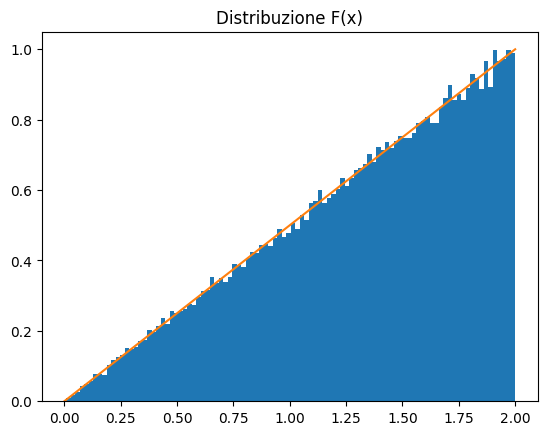

In [ ]:
import matplotlib.pyplot as plt


def function(x):
    return x / 2


def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a)
        eta = M * r2
        if eta <= function(xi):
            break
    return xi


a = 0
b = 2
M = function(2)

N = 100000
X = np.zeros(N)
for i in range(N):
    X[i] = rigetto(a, b, M)

assex = np.linspace(a, b, 1000)
assey = function(assex)

plt.hist(X, bins=100, density=True)
plt.plot(assex, assey)
plt.title("Distribuzione F(x)")
plt.show()